# Append

In [1]:
import pandas as pd
# Buatlah series of int (s1) dan series of string (s2)
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series(["a", "b", "c", "d", "e", "f"])

# Terapkan metode append
s1_append_s2 = s1.append(s2)
print("Series - append:\n", s1_append_s2)

Series - append:
 0    1
1    2
2    3
3    4
4    5
5    6
0    a
1    b
2    c
3    d
4    e
5    f
dtype: object


In [2]:
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1, 2],
                    'b':[3, 4]})
df2 = pd.DataFrame({'b':[1, 2],
                    'a':[3, 4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


# Concat

In [3]:
import pandas as pd

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1, 2],
                    'b':[3, 4]})
df2 = pd.DataFrame({'b':[1, 2],
                    'a':[3, 4]})

# Terapkan method concat row-wise
row_wise_concat = pd.concat([df2, df1])
print("Row-wise - concat:\n", row_wise_concat)

Row-wise - concat:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


In [4]:
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df2, df1], axis=1)
print("Column-wise - concat:\n", col_wise_concat)

Column-wise - concat:
    b  a  a  b
0  1  3  1  3
1  2  4  2  4


In [5]:
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df2, df1], axis=0, keys=['df1', 'df2'])
print("Multiindex - concat:\n", multiindex_concat)

Multiindex - concat:
        b  a
df1 0  1  3
    1  2  4
df2 0  3  1
    1  4  2


# Merge - Part 1

In [6]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'key':['k1', 'k2', 'k3', 'k4', 'k5'],
                    'val1':[200, 500, 0, 500, 100],
                    'val2':[30, 50, 100, 20, 10]})
df2 = pd.DataFrame({'key':['k1', 'k3', 'k5', 'k7', 'k10'],
                    'val3':[1, 2, 3, 4, 5],
                    'val4':[6, 7, 8, 8, 10]})

In [7]:
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left=df2, right=df1, how='left', left_on='key', right_on='key')
print('Merge - Left:\n', merge_df_left)

Merge - Left:
    key  val3  val4   val1   val2
0   k1     1     6  200.0   30.0
1   k3     2     7    0.0  100.0
2   k5     3     8  100.0   10.0
3   k7     4     8    NaN    NaN
4  k10     5    10    NaN    NaN


In [8]:
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left=df2, right=df1, how='right', left_on='key', right_on='key')
print('Merge - Right:\n', merge_df_right)

Merge - Right:
   key  val3  val4  val1  val2
0  k1   1.0   6.0   200    30
1  k2   NaN   NaN   500    50
2  k3   2.0   7.0     0   100
3  k4   NaN   NaN   500    20
4  k5   3.0   8.0   100    10


In [9]:
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df2, right=df1, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)

Merge - Inner:
   key  val3  val4  val1  val2
0  k1     1     6   200    30
1  k3     2     7     0   100
2  k5     3     8   100    10


In [10]:
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df2, right=df1, how='outer', left_on='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Outer:
    key  val3  val4   val1   val2
0   k1   1.0   6.0  200.0   30.0
1   k3   2.0   7.0    0.0  100.0
2   k5   3.0   8.0  100.0   10.0
3   k7   4.0   8.0    NaN    NaN
4  k10   5.0  10.0    NaN    NaN
5   k2   NaN   NaN  500.0   50.0
6   k4   NaN   NaN  500.0   20.0


# Merge - Part 2

In [11]:
import pandas as pd

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'key':['k1', 'k2', 'k3', 'k4', 'k5'],
                    'val1':[200, 500, 0, 500, 100], 
                    'val2':[30, 50, 100, 20, 10]}).set_index(['key', 'val2'])
print('Dataframe 1:\n', df1)

df2 = pd.DataFrame({'key':['k1', 'k3', 'k5', 'k7', 'k10'],
                    'val3':[1, 2, 3, 4, 5], 
                    'val4':[6, 7, 8, 8, 10]}).set_index(['key', 'val3'])
print('Dataframe 2:\n', df2)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10


In [12]:
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(), df2.reset_index())
print('Merging dataframe:\n', df_merge)

Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


# Join

In [13]:
import pandas as pd

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'key':['k1', 'k2', 'k3', 'k4', 'k5'],
                    'val1':[200, 500, 0, 500, 100],
                    'val2':[30, 50, 100, 20, 10]})
df2 = pd.DataFrame({'key':['k1', 'k3', 'k5', 'k7', 'k10'],
                    'val3':[1, 2, 3, 4, 5],
                    'val4':[6, 7, 8, 8, 10]})

In [14]:
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


# Dataset

In [15]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math','english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])

# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


# Pivot

In [16]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math', 'english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])

In [17]:
# Pivoting with single column measurement
pivot1 = data.pivot(index='murid', columns='pelajaran', values='nilai')
print('Pivoting with single column measurement:\n', pivot1)

Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60


In [18]:
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid', columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


# Pivot_table

In [19]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math', 'english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])

In [20]:
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0


In [21]:
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


In [22]:
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc=sum
pivot_tab_sum = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc=sum)
print('Creating pivot table -- aggfunc sum:\n', pivot_tab_sum)

Creating pivot table -- aggfunc sum:
 pelajaran  english  math
kelas                   
A              205   210
B              165   255


# Melt - Part 1

In [23]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math', 'english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])

# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0


In [24]:
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)

Melting dataframe:
   pelajaran    value
0     kelas        A
1     kelas        B
2   english  68.3333
3   english       55
4      math       70
5      math       85


In [25]:
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


# Melt - Part 2

In [26]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math', 'english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])

# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0


In [27]:
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)

Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0


In [28]:
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)

Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0


In [29]:
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english','math'], var_name='pelajaran', value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran      nilai
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


# Stack & Unstack - Part 1

In [30]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math', 'english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])

In [31]:
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas', 'murid', 'pelajaran'])
print('Dataframe multi index:\n', data)

Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45


In [32]:
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)

Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85   70
      A3         60   50
B     B1         40  100
      B2         80   95
      B3         45   60


In [33]:
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)

Unstacking dataframe dengan level name:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


In [34]:
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

Unstacking dataframe dengan level position:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


# Stack & Unstack - Part 2

In [35]:
import pandas as pd
# Dataframe
data = pd.DataFrame({'kelas': 6 * ['A'] + 6 * ['B'],
                     'murid': 2 * ['A1'] + 2 * ['A2'] + 2 * ['A3'] + 2 * ['B1'] + 2 * ['B2'] + 2 * ['B3'],
                     'pelajaran': 6 * ['math', 'english'],
                     'nilai': [90, 60, 70, 85, 50, 60, 100, 40, 95, 80, 60, 45]}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
data = data.set_index(['kelas', 'murid', 'pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


In [36]:
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)

Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0


In [37]:
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1, 2)
print('Swapped data:\n', data_swap)

Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
      A2    math        70.0
      A3    math        50.0
B     B1    english     40.0
      B2    english     80.0
      B3    english     45.0
      B1    math       100.0
      B2    math        95.0
      B3    math        60.0


In [38]:
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Sorted data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
            math        90.0
      A2    english     85.0
            math        70.0
      A3    english     60.0
            math        50.0
B     B1    english     40.0
            math       100.0
      B2    english     80.0
            math        95.0
      B3    english     45.0
            math        60.0


# Review Inspeksi Data

In [39]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())

Lima data teratas:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]


In [40]:
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 2   country                 4000 non-null   object 
 3   pollutant               4000 non-null   object 
 4   value                   4000 non-null   float64
 5   timestamp               4000 non-null   object 
 6   unit                    4000 non-null   object 
 7   source_name             4000 non-null   object 
 8   latitude                4000 non-null   float64
 9   longitude               4000 non-null   float64
 10  averaged_over_in_hours  3634 non-null   float64
dtypes: float64(4), object(7)
memory usage: 343.9+ KB
Info global_air_quality:
 None


In [41]:
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())

Count tanpa groupby:
 location                  3997
city                      3966
country                   4000
pollutant                 4000
value                     4000
timestamp                 4000
unit                      4000
source_name               4000
latitude                  4000
longitude                 4000
averaged_over_in_hours    3634
dtype: int64


In [42]:
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Count dengan groupby (5 data teratas):
              location  city  ...  longitude  averaged_over_in_hours
source_name                  ...                                   
ARPALAZIO          72    72  ...         72                      72
Agaar.mn           27    27  ...         27                       0
AirNow           1712  1681  ...       1715                    1715
Andalucia          71    71  ...         71                      71
Anqing              4     4  ...          4                       4

[5 rows x 10 columns]


# Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 1

In [43]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

In [44]:
# Create variabel pollutant 
pollutant = gaq[['country', 'city', 'pollutant', 'value']].pivot_table(index=['country', 'city'], columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


In [45]:
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())

Rata-rata pollutant (5 teratas):
           value                         ...                                 
pollutant    bc          co        no2  ...       pm10       pm25        so2
country                                 ...                                 
AR          0.0    0.000000   0.000000  ...   0.000000  18.100000   0.000000
AU          0.0    0.000000   0.000000  ...   0.000000   3.900000   0.000000
BA          0.0  475.833333  19.500000  ...  40.333333   0.000000  18.000000
CA          0.0    0.036818   0.000355  ...   0.836364   3.433601   0.000091
CL          0.0    0.000000  21.000000  ...   0.000000   0.000000   0.000000

[5 rows x 7 columns]


In [46]:
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Standar deviasi pollutant (5 teratas):
         value                                                                 
           bc          co        no2        o3       pm10      pm25        so2
country                                                                       
AR        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
AU        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
BA        0.0  536.925476  11.945711  8.207720  46.701891  0.000000  30.403947
CA        0.0    0.089841   0.000750  0.019323   1.713052  2.286509   0.000302
CL        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000


# Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 2

In [47]:
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())

Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.000000  108.000
CA          0.0     0.405    0.0039   0.285593    9.2  37.769608    0.001
CL          0.0     0.000   21.0000   0.000000    0.0   0.000000    0.000


In [48]:
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Jumlah unique value pollutant (5 teratas):
           value                        
pollutant    bc co no2 o3 pm10 pm25 so2
country                                
AR            1  1   1  1    1    1   1
AU            1  1   1  1    1    1   1
BA            1  6   6  4    5    1   4
CA            1  3   4  9    4   10   2
CL            1  1   1  1    1    1   1


# Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 3

In [49]:
# Group berdasarkan country dan terapkan aggregasi min
pollutant_min = pollutant.groupby('country').min()
print('Nilai min pollutant (5 teratas):\n', pollutant_min.head())

Nilai min pollutant (5 teratas):
           value                                
pollutant    bc   co   no2   o3 pm10  pm25  so2
country                                        
AR          0.0  0.0   0.0  0.0  0.0  18.1  0.0
AU          0.0  0.0   0.0  0.0  0.0   3.9  0.0
BA          0.0  0.0   0.0  0.0  0.0   0.0  0.0
CA          0.0  0.0   0.0  0.0  0.0   0.0  0.0
CL          0.0  0.0  21.0  0.0  0.0   0.0  0.0


In [50]:
# Group berdasarkan country dan terapkan aggregasi max
pollutant_max = pollutant.groupby('country').max()
print('Nilai min pollutant (5 teratas):\n', pollutant_max.head())

Nilai min pollutant (5 teratas):
           value                                                   
pollutant    bc        co      no2         o3   pm10  pm25     so2
country                                                           
AR          0.0     0.000   0.0000   0.000000    0.0  18.1   0.000
AU          0.0     0.000   0.0000   0.000000    0.0   3.9   0.000
BA          0.0  1508.000  32.0000  21.000000  100.0   0.0  78.000
CA          0.0     0.285   0.0024   0.048333    5.2   6.0   0.001
CL          0.0     0.000  21.0000   0.000000    0.0   0.0   0.000


In [51]:
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())

Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL          0.0    0.000  21.0000  0.000000  0.0   0.0  0.0


In [52]:
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Item terakhir pollutant (5 teratas):
           value                                      
pollutant    bc     co   no2     o3  pm10  pm25   so2
country                                              
AR          0.0    0.0   0.0  0.000   0.0  18.1   0.0
AU          0.0    0.0   0.0  0.000   0.0   3.9   0.0
BA          0.0  292.0  29.0  0.000  96.0   0.0  78.0
CA          0.0    0.0   0.0  0.036   3.0   0.0   0.0
CL          0.0    0.0  21.0  0.000   0.0   0.0   0.0


# Groupby dengan Multiple Aggregations

In [53]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Create variabel pollutant 
pollutant = gaq[['country', 'city', 'pollutant', 'value']].pivot_table(index=['country', 'city'], columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


In [54]:
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min', 'median', 'mean', 'max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Multiple aggregations (5 teratas):
         value                        ...                                     
           bc                    co  ...  pm25  so2                          
          min median mean  max  min  ...   max  min median       mean     max
country                              ...                                     
AR        0.0    0.0  0.0  0.0  0.0  ...  18.1  0.0    0.0   0.000000   0.000
AU        0.0    0.0  0.0  0.0  0.0  ...   3.9  0.0    0.0   0.000000   0.000
BA        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    5.5  18.000000  78.000
CA        0.0    0.0  0.0  0.0  0.0  ...   6.0  0.0    0.0   0.000091   0.001
CL        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   0.000000   0.000

[5 rows x 28 columns]


# Groupby dengan Custom Aggregations

In [55]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Create variabel pollutant 
pollutant = gaq[['country', 'city', 'pollutant', 'value']].pivot_table(index=['country', 'city'], columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


In [56]:
# Create function: data_range
def data_range(series):
    return series.max() - series.min()

# Group berdasarkan country dan terapkan aggregasi dari function: range
custom_agg = pollutant.groupby('country').agg(data_range)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc        co      no2         o3   pm10 pm25     so2
country                                                        
AR        0.0     0.000   0.0000   0.000000    0.0  0.0   0.000
AU        0.0     0.000   0.0000   0.000000    0.0  0.0   0.000
BA        0.0  1508.000  32.0000  21.000000  100.0  0.0  78.000
CA        0.0     0.285   0.0024   0.048333    5.2  6.0   0.001
CL        0.0     0.000   0.0000   0.000000    0.0  0.0   0.000


In [57]:
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3 - Q1

# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc      co       no2        o3  pm10      pm25   so2
country                                                        
AR        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA        0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA        0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


# Groupby dengan Custom Aggregations by dict

In [58]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Create variabel pollutant 
pollutant = gaq[['country', 'city', 'pollutant', 'value']].pivot_table(index=['country', 'city'], columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


In [59]:
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)

# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10', 'pm25', 'so2']].groupby('country').agg({'pm10':'median',
                                                                                      'pm25':iqr,
                                                                                      'so2':iqr})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())


Cetak 5 data teratas custom_agg_dict:
          pm10      pm25   so2
country                      
AR        0.0  0.000000   0.0
AU        0.0  0.000000   0.0
BA       23.0  0.000000  17.0
CA        0.0  3.876471   0.0
CL        0.0  0.000000   0.0


# Load Dataset as Time Series

In [60]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())

                                                  location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]


In [61]:
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2017-01-18 16:00:00+00:00 to 2017-01-08 08:00:00+00:00
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 2   country                 4000 non-null   object 
 3   pollutant               4000 non-null   object 
 4   value                   4000 non-null   float64
 5   unit                    4000 non-null   object 
 6   source_name             4000 non-null   object 
 7   latitude                4000 non-null   float64
 8   longitude               4000 non-null   float64
 9   averaged_over_in_hours  3634 non-null   float64
dtypes: float64(4), object(6)
memory usage: 343.8+ KB
None


# Convert to Datetime

In [62]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]


In [63]:
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')

In [64]:
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sesudah diubah dalam format datetime:
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]


# Downsampling Data

In [65]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())

Dataset sebelum di-downsampling (5 teratas):
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]


In [66]:
# Downsampling dari daily to monthly dan kita hitung rata-rata untuk sebulan
gaq_monthly = gaq.resample('M').mean()
print('Downsampling daily to monthly - mean (5 teratas):\n', gaq_monthly.head())

Downsampling daily to monthly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-06-30 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-07-31 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-08-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    NaN       NaN        NaN                     NaN


In [67]:
# Downsampling dari daily to yearly dan kita hitung total untuk setiap tahun
gaq_yearly = gaq.resample('A').sum()
print('Downsampling daily to yearly - sum (5 teratas):\n', gaq_yearly.head())

Downsampling daily to yearly - sum (5 teratas):
                                    value  ...  averaged_over_in_hours
timestamp                                 ...                        
2014-12-31 00:00:00+00:00      16.800000  ...                    2.00
2015-12-31 00:00:00+00:00     319.209800  ...                   30.00
2016-12-31 00:00:00+00:00   11356.389400  ...                  172.25
2017-12-31 00:00:00+00:00   20181.246425  ...                  147.75
2018-12-31 00:00:00+00:00 -282811.729944  ...                 1284.50

[5 rows x 4 columns]


In [ ]:
 [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())

In [ ]:
# [2] Downsampling dari daily to quaterly dan kita hitung minimumnya untuk tiap quarter
gaq_quaterly = gaq.resample('Q').min()
print('Downsampling daily to quaterly - min (5 teratas):\n', gaq_quaterly.head())

# Upsampling Data

In [69]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())

Dataset sebelum di-upsampling (5 teratas):
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]


In [70]:
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())  

Upsampling daily to hourly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 03:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-13 04:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 05:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 06:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 07:00:00+00:00    NaN       NaN        NaN                     NaN


# Resampling by Frequency

In [71]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())

Dataset sebelum di-resampling (5 teratas):
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]


In [72]:
# Downsampling dari daily to 2 weekly, hitung reratanya, dan fillna = 'ffill'
gaq_2weekly = gaq.resample('2W').mean().fillna(method='ffill')
print('Resampling daily to 2 weekly - mean - ffill (5 teratas):\n', gaq_2weekly.head())

Resampling daily to 2 weekly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-18 00:00:00+00:00    9.7    14.635     121.08                     1.0
2014-06-01 00:00:00+00:00    9.7    14.635     121.08                     1.0
2014-06-15 00:00:00+00:00    9.7    14.635     121.08                     1.0
2014-06-29 00:00:00+00:00    9.7    14.635     121.08                     1.0
2014-07-13 00:00:00+00:00    9.7    14.635     121.08                     1.0


In [73]:
# Upsampling dari daily to 8 hourly, hitung reratanya, dan fillna = 'bfill'
gaq_8hourly = gaq.resample('8H').mean().fillna(method='bfill')
print('Resampling daily to 8 hourly - mean - bfill (5 teratas):\n', gaq_8hourly.head())

Resampling daily to 8 hourly - mean - bfill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-05-13 08:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-05-13 16:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-05-14 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-05-14 08:00:00+00:00    7.1    37.132    -86.148                     1.0


In [74]:
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - bfill (5 teratas):\n', gaq_2monthly.head())

Resampling daily to 2 monthly - mean - bfill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


# Visualisasi

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')

In [76]:
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp', 'pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())

Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


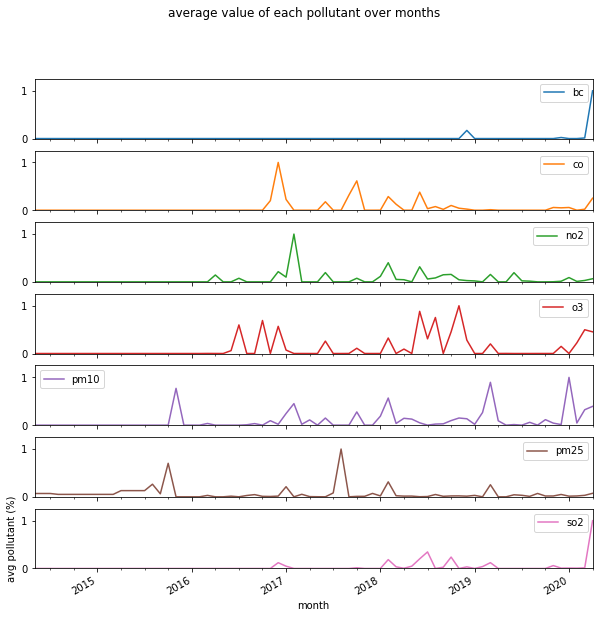

In [77]:
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

# Performa Penjualan di Setiap Cabang - Part 1

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_1_until_3.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_4_until_6.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_7_until_9.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_10_until_12.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')

# Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())

# Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)

# Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])

# Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())

# Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


PENGECEKAN DATA


   order_id order_date  customer_id  ... quantity item_price total_price
0   1612339   01-01-19        18055  ...        4    1934000     7736000
1   1612339   01-01-19        18055  ...        8     604000     4832000
2   1612339   01-01-19        18055  ...       12     747000     8964000
3   1612339   01-01-19        18055  ...       12     450000     5400000
4   1612339   01-01-19        18055  ...        3    1500000     4500000

[5 rows x 10 columns]
Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data2: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data3: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'

# Performa Penjualan di setiap Cabang - Part 2

In [79]:
# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')

# Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)

# Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
  retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

# Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)

# Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

# Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')

# Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

# Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())

# Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
         order_id order_date  customer_id  ... quantity  item_price total_price
83664  undefined   06-09-19            0  ...        1 -3871709000 -3871709000
83665  undefined   06-09-19            0  ...        1 -3871709000 -3871709000

[2 rows x 10 columns]

order_id yang bernilai undefined:
         order_id order_date  customer_id  ... quantity  item_price total_price
83663  undefined   06-09-19            0  ...        1  3871733000  3871733000

[1 rows x 10 columns]

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508554 entries, 0 to 201825
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     508554 non-null  int64         
 1   order_date   508554 non-null  datetime64[ns]
 2   customer_id  508554 non-null  int64         
 3   city         508554 non-null  object        
 4   province     508554 non-null  object     

# Performa Penjualan di setiap Cabang - Part 3

In [80]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

# Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date', 'province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})

# Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order', 'customer', 'product', 'brand', 'GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     17        17      259     22  1877858000
           Jawa Barat      10         9      194     22  1290147000
           Jawa Tengah      4         3       49     15  1813991000
           Jawa Timur       6         6       63     19   663106000
           Yogyakarta       2         2       56     19   549622000

unstack_city_province (5 dat

# Performa Penjualan di setiap Cabang - Part 4

In [81]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:, idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         17.0        10.0          4.0         6.0         2.0
2019-01-03         11.0         4.0         10.0         5.0         6.0
2019-01-04         30.0         7.0          8.0         1.0         8.0
2019-01-05         21.0         8.0          2.0         3.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    21.526316    8.684211     4.421053    3.473684    4.368421
2019-02-28    24.391304    8.173913     3.652174    3.869565    4.130435
2019-03-31    25.111111    7.481481     3.703704    4.370370    3.740741
2019-04-30    25.884615    9.807692     4.538462    4

# Performa Penjualan di setiap Cabang - Part 5

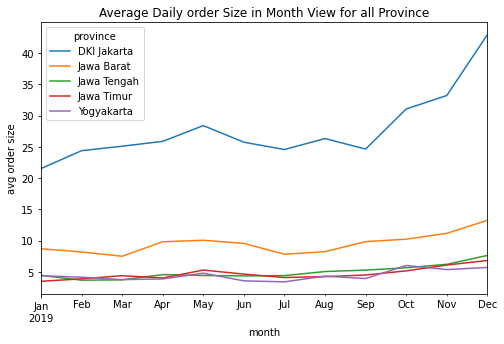

In [82]:
import matplotlib.pyplot as plt

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

# Performa Penjualan di setiap Cabang - Part 6

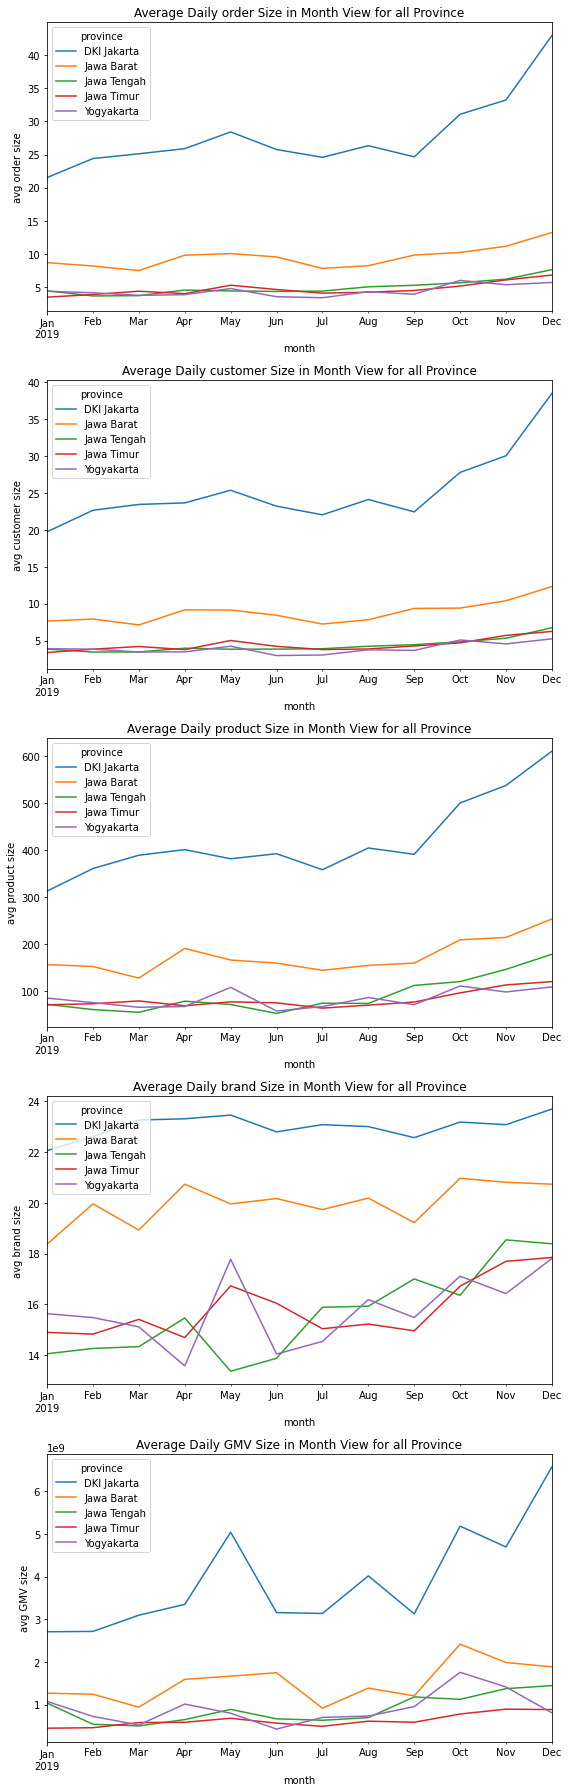

In [83]:
import matplotlib.pyplot as plt

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:, idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()